<a href="https://colab.research.google.com/github/jvahedi/Wordle_Assistant/blob/main/char_hit_dist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
letters_possible = "abcdefghijklmnopqrstuvwxyz" #@param {type:"string"}
letters_definitely = "st" #@param {type:"string"}
letters_position = "?????" #@param {type:"string"}
show_graph = False #@param {type:"boolean"}

one_random = False #@param {type:"boolean"}

import numpy as np
possible = list(letters_possible) 
position = list(letters_position) 
definitely = list(letters_definitely) 

import urllib.request
url = "https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt"
file = urllib.request.urlopen(url)
list_o_words = [((line.decode('utf-8').strip()).split()) for line in file]
file.close()

list_o_words = np.array(list_o_words)
length = np.char.str_len(list_o_words)
list_o_words = list_o_words[length == 5]
matrix_o_char = np.array([list(w) for w in list_o_words])

words = list_o_words
print(words.shape)
req = np.ones(len(words)).astype(bool)
i = 0
for L in position:
  if L == '?' or L == ' ':
    pass
  else:
    req = np.logical_and(req, matrix_o_char[:,i] == L)
  i = i+1
words = words[req]
matrix_o_char = matrix_o_char[req]

has = np.ones(len(words)).astype(bool)
for k in definitely:
  if k != ' ':
    has = np.logical_and(has,np.sum(matrix_o_char == k, axis = 1) > 0)
words = words[has]
matrix_o_char = matrix_o_char[has]

hits = np.zeros(len(words))
for l in possible:
  out  = np.sum(matrix_o_char == l, axis = 1)
  hits = hits + out
words = words[hits > 4]
matrix_o_char = matrix_o_char[hits > 4]

if one_random == False:
  print(words.shape)
else:
  ind = int(np.random.rand()*len(words))
  print(words[ind])

if show_graph == True:
  let, count = np.unique(matrix_o_char, return_counts = True)
  ord = let[np.argsort(-count)]
  import matplotlib.pyplot as plt
  plt.bar(ord,count[np.argsort(-count)])
  plt.title('5 letter word character frequency')
  plt.show()

(15918,)
(1413,)


0.01291
0.003903


(array([1.70249667, 0.        , 0.        , 1.34777   , 0.        ,
        0.        , 0.27005667, 0.        , 0.        , 0.01301   ]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

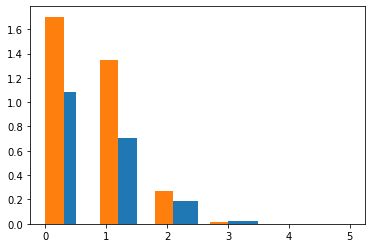

In [64]:
import random
letters = list('abcdefghijklmnopqrstuvwxyz')

n=1000000
#make up words with repetition 
W = np.empty((n,5), dtype = str)
for i in range(n):
  W[i,:] = np.array(random.choices(letters, k = 5))
  #W[i,:] = np.array(random.sample(letters, k = 5))

#number of hits of select letters in each word
D1 = np.sum(W == 'a', axis = 1) + np.sum(W == 'b', axis = 1) + np.sum(W == 'c', axis = 1)
#sum of number of words that have at least 3 hits
h = np.sum(D1>2)

#print ratio of successes to total
print(h/n)

#make up words without repetition 
W = np.empty((n,5), dtype = str)
for i in range(n):
  #W[i,:] = np.array(random.choices(letters, k = 5))
  W[i,:] = np.array(random.sample(letters, k = 5))

D2 = np.sum(W == 'a', axis = 1) + np.sum(W == 'b', axis = 1) + np.sum(W == 'c', axis = 1)
h = np.sum(D2>2)

print(h/n)
import matplotlib.pyplot as plt

plt.hist(D1, density = True)
plt.hist(D2, density = True)